## Are COVID vaccines safe to get?

This project is a personal learning project to understand the risks of getting the COVID vaccines. There is an accompanying blog post that went with it: 


We'll be using the following data sets: 
- VAERS (primary dataset): https://vaers.hhs.gov/data.html
- Our World in Data: https://ourworldindata.org/coronavirus
- Injury facts: https://injuryfacts.nsc.org/all-injuries/preventable-death-overview/odds-of-dying/
- COVID risk percentages: https://19andme.covid19.mathematica.org/
- CDC COVID data: https://covid.cdc.gov/covid-data-tracker/#datatracker-home

VAERS data use guide: https://vaers.hhs.gov/docs/VAERSDataUseGuide_November2020.pdf

Columns in VAERS data set:
- VAX_MANU
- AGE_YRS
- CAGE_YR
- CAGE_MO
- SEX
- RPT_DATE
- SYMPTOM_TEXT
- DIED
- DATEDIED
- L_THREAT
- ER_VISIT
- HOSPITAL
- HOSPDAYS
- X_STAY
- DISABLE
- RECOVD
- VAX_DATE
- ONSET_DATE
- NUMDAYS
- LAB_DATA
- V_ADMINBY
- V_FUNDBY
- OTHER_MEDS
- CUR_ILL
- HISTORY
- PRIOR_VAX
- SPLTTYPE
- FORM_VERS
- TODAYS_DATE
- BIRTH_DEFECT
- OFC_VISIT
- ER_ED_VISIT
- ALLERGIES
- VAX_DOSE_SERIES
- VAX_ROUTE
- VAX_SITE
- RECVDATE
- STATE

In [1]:
import pandas as pd
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

vaers_data_2021 = pd.read_csv('/Users/tenzin/Downloads/2021VAERSData_1/2021VAERSDATA.csv', encoding='latin1')
vaers_symptoms_2021 = pd.read_csv('/Users/tenzin/Downloads/2021VAERSData_1/2021VAERSSYMPTOMS.csv', encoding='latin1')
vaers_vaccine_2021 = pd.read_csv('/Users/tenzin/Downloads/2021VAERSData_1/2021VAERSVAX.csv', encoding='latin1')

vaers_data_2020 = pd.read_csv('/Users/tenzin/Downloads/2020VAERSData/2020VAERSDATA.csv', encoding='latin1')
vaers_symptoms_2020 = pd.read_csv('/Users/tenzin/Downloads/2020VAERSData/2020VAERSSYMPTOMS.csv', encoding='latin1')
vaers_vaccine_2020 = pd.read_csv('/Users/tenzin/Downloads/2020VAERSData/2020VAERSVAX.csv', encoding='latin1')

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)


/Users/tenzin/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,12,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/tenzin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [2]:
# We're going to combine the 2020 & 2021 datasets together by the COVID ID


combined_vaccine = pd.concat([vaers_vaccine_2020, vaers_vaccine_2021], axis=0)

combined_symptoms = pd.concat([vaers_symptoms_2020, vaers_symptoms_2021])

combined_data = pd.concat([vaers_data_2020, vaers_data_2021])



In [3]:
# Only people that have recived the COVID vaccine, eliminating the others 
combined_vaccine = combined_vaccine[combined_vaccine['VAX_TYPE'] == 'COVID19']

### Combining Data sets, investigating duplicates, and removing superflous columns 

We've combined the 2020 & 2021 datasets, made sure that we're only looking at cases that have taken the COVID vaccine. Next, we're going to join all 3 dataframes. We'll need to check the length of combined vaccine ahead of time as that should be the number of rows for the total dataframe. 

We'll also look to remove the duplicates and remove columns that are unnecessary. 

In [4]:
# Length is: 11229

len(combined_vaccine)

master_df = combined_vaccine.merge(combined_data,on='VAERS_ID')


# Checking to see the length...

len(master_df)



156761

Upon investigation of the VAERS Symptoms data I decided to remove it as it created over 3000 duplicates when joined with the total dataframe. If we need to investigate into symptoms further we can always add the DF's together at 'VAERS_ID'. 

In [5]:
# Create a Boolean series, then loop through and find the index of the duplicates

boolean = master_df.duplicated(subset=['VAERS_ID'])

index_of_duplicates = []
for index,b in enumerate(boolean):
    if b == True: 
        index_of_duplicates.append(index)
    
print(index_of_duplicates)    
len(index_of_duplicates)

[1512, 2189, 2863, 3284, 4530, 4663, 5860, 7028, 7436, 7562, 8259, 8832, 10852, 11888, 12978, 13502, 13522, 13558, 13650, 13652, 13680, 14689, 14775, 15528, 15569, 16221, 16766, 17339, 17593, 17722, 17971, 18814, 18952, 19182, 19995, 20840, 20860, 21155, 21169, 21282, 21364, 21476, 21505, 21613, 21670, 21705, 21706, 21759, 21861, 22016, 22132, 22305, 22457, 22627, 22879, 22907, 22919, 22928, 23021, 23087, 23118, 23121, 23275, 23349, 23541, 23830, 23854, 23864, 23884, 24010, 24011, 24110, 24229, 24292, 24341, 24374, 24376, 24419, 24435, 24607, 24617, 24650, 24798, 24872, 24914, 25065, 25110, 25605, 25653, 26142, 26220, 26432, 26445, 26717, 26754, 26755, 26830, 26947, 26965, 27016, 27074, 27141, 27252, 27577, 27592, 27599, 27606, 27712, 27762, 27907, 28019, 28074, 28117, 28219, 28357, 28367, 28382, 28469, 28560, 28614, 28642, 28660, 28694, 28920, 28956, 29307, 29374, 29433, 29571, 29584, 29684, 29784, 30014, 30076, 30167, 30328, 30626, 30903, 31135, 31205, 31284, 31327, 31379, 31391, 315

2148

In [6]:
# Example of 1 duplicate

print(master_df.iloc[[2188,2189]])
master_df[master_df['VAERS_ID'] == 906428]


      VAERS_ID VAX_TYPE         VAX_MANU VAX_LOT VAX_DOSE_SERIES VAX_ROUTE  \
2188  906428    COVID19  PFIZER\BIONTECH  NaN     1               IM         
2189  906428    COVID19  PFIZER\BIONTECH  EJ1685  1               IM         

     VAX_SITE                             VAX_NAME    RECVDATE STATE  AGE_YRS  \
2188  NaN      COVID19 (COVID19 (PFIZER-BIONTECH))  12/22/2020  NE    38.0      
2189  LA       COVID19 (COVID19 (PFIZER-BIONTECH))  12/22/2020  NE    38.0      

      CAGE_YR  CAGE_MO SEX RPT_DATE  \
2188  38.0    NaN       F   NaN       
2189  38.0    NaN       F   NaN       

                                                                                                                                                                                                                                                                                                                                                                                                                   

VAERS_ID VAX_TYPE         VAX_MANU VAX_LOT VAX_DOSE_SERIES VAX_ROUTE  \
2188  906428    COVID19  PFIZER\BIONTECH  NaN     1               IM         
2189  906428    COVID19  PFIZER\BIONTECH  EJ1685  1               IM         

     VAX_SITE                             VAX_NAME    RECVDATE STATE  AGE_YRS  \
2188  NaN      COVID19 (COVID19 (PFIZER-BIONTECH))  12/22/2020  NE    38.0      
2189  LA       COVID19 (COVID19 (PFIZER-BIONTECH))  12/22/2020  NE    38.0      

      CAGE_YR  CAGE_MO SEX RPT_DATE  \
2188  38.0    NaN       F   NaN       
2189  38.0    NaN       F   NaN       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

Removing the duplicates & columns that don't add value to the investigation (as the information is covered in another column).

- VAX_TYPE 
- VAX_LOT 
- VAX_NAME



In [7]:
master_df = master_df.drop(index_of_duplicates)
master_df = master_df.drop(columns=['VAX_TYPE', 'VAX_LOT', 'VAX_NAME'], axis=1)

In [8]:
#Re-ordering the columns
master_df.columns

new_column_order = ['VAX_MANU', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX', 'RPT_DATE',
       'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL',
       'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE', 'ONSET_DATE',
       'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY', 'OTHER_MEDS', 'CUR_ILL',
       'HISTORY', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE',
       'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE',
       'RECVDATE', 'STATE']

master_df = master_df.reindex(columns=new_column_order)

### Cleaning the data

The next step is to inspect some of the columns and see what needs to be cleaned. As a first order of inspection, we're going to be working with some of the symptom text to see if we can disect anything interesting. 

We'll also be looking at prior conditions (allergies, history, other_meds) to see if there are any correlations between that and hospital visits. 



In [9]:
master_df[(master_df['HOSPITAL'] == 'Y') & (master_df['AGE_YRS'] < 40)]


,VAX_MANU,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,RECVDATE,STATE
475,PFIZER\BIONTECH,34.0,NaN,NaN,F,NaN,"Not all or limited to: anaphylactic reaction: Feeling lump in throat, tongue feeling funny with numbness, feeling of hard to swallow, throat tightness, shortness of breath, tachycardia, tachypnea, pressure, tingling, and numbness from head to toe, dizziness/lightheartedness, cough, voice changes.",NaN,NaN,Y,NaN,Y,1.0,NaN,NaN,Y,12/17/2020,12/17/2020,0.0,Ask physicians,PVT,NaN,Levoxyl,None noted,"Graves, Hashimoto?s",Flu vaccine,NaN,2,12/18/2020,NaN,NaN,Y,"Levaquin, methimazole, flu vaccine with preservatives",1,IM,LA,12/18/2020,OH
611,PFIZER\BIONTECH,36.0,36.0,NaN,F,NaN,Angioedema,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,Y,12/17/2020,12/17/2020,0.0,"CBC, BMP, HCG",PVT,NaN,"Levothyroxine 100 mcg, albuterol HFA, Wellbutrin XL",None,"CSF leak, migraines, asthma",NaN,NaN,2,12/18/2020,NaN,NaN,Y,"Amoxicillin (hives), divalproex (swelling)",1,IM,LA,12/18/2020,AZ
755,PFIZER\BIONTECH,29.0,29.0,NaN,M,NaN,"Presented with periumbilical pain to emergency department (patient works at Medical Center). Admitted to hospital for small bowel obstruction. Labs were consistent with dehydration (Hct 55, Cr 1.25), as well as CRP 1.10. A CT Abd/Pelvis identified proximal dilation and fecalization of small bowel, with a transition point in the left lower quadrant. Distal to the transition point, the small bowel appears thick, with hyperenhancement and inflammation progressing into the cecum. General Surgery was consulted and patient admitted to hospital for management of this small bowel obstruction.",NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,12/17/2020,12/18/2020,1.0,12/18/20 - CT Abdomen and Pelvis w/ Contrast,MIL,NaN,Denies any home medications,None,None,NaN,NaN,2,12/18/2020,NaN,NaN,Y,Denies any allergies,1,SYR,AR,12/18/2020,WA
760,PFIZER\BIONTECH,29.0,29.0,NaN,F,NaN,"rash appeared at site of injection, very painful, hot to touch, hard, with rash spreading to torso",NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,N,12/18/2020,12/18/2020,0.0,6:11PM: 185/71 Temp 98.2 sat 98% HR85,PVT,NaN,Microgestin,none,none,NaN,NaN,2,12/18/2020,NaN,NaN,NaN,NKA,1,IM,RA,12/18/2020,TX
869,PFIZER\BIONTECH,34.0,34.0,NaN,F,NaN,Chest Tightness and shortness of breath,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,12/18/2020,12/18/2020,0.0,NaN,PVT,NaN,allegra Klonopin Lamictal Latuda Implanon PRILOSEC Synthroid albuterol inhaler,NaN,Asthma gerd hypothyroid gastric sleeve GI bleed,NaN,NaN,2,12/19/2020,NaN,NaN,NaN,"Latex, eggs, pork, shellfish, beef, cinamon",1,IM,RA,12/19/2020,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156399,PFIZER\BIONTECH,20.0,NaN,NaN,F,NaN,"had two blood clots on her lungs; This is a spontaneous report from a contactable consumer. A 20-year-old female patient received bnt162b2 (PFIZER-BIONTECH COVID-19 VACCINE), first dose at the age of 20-years-old via an unspecified route of administration, administered in arm left on 28Mar2021 12:30 (Batch/Lot Number: ER8730) as single dose for covid-19 immunisation. Medical history included birth control from an unknown date and unknown if ongoing. Concomitant medication included ethinylestradiol, norgestimate (SPRINTEC) taken for birth control from Dec2020 to 12Apr2021. The patient experienced had two blood clots on her lungs on 12Apr2021 18:00. The patient was hospitalized due to the event from 12Apr2021 to 14Apr2021. The patient was recovering from the event.",NaN,NaN,NaN,NaN,Y,3.0,NaN,NaN,N,03/28/2021,04/12/2021,15.0,NaN,PHM,NaN,SPRINTEC,NaN,Medical History/Concurrent Conditions: Birth control,NaN,USPFIZER INC2021419732,2,04/28/2021,NaN,Y,Y,NaN,1,NaN,LA,04/29/2021,RI

In [10]:
# Other Meds column, lower case + replace

master_df['OTHER_MEDS'] = master_df['OTHER_MEDS'].str.lower().replace('no', 'none').replace(r'[,-/]', ' ', regex=True).replace(np.nan, '', regex=True)

master_df['LAB_DATA'] = master_df['LAB_DATA'].str.lower().replace(['no', 'none.', 'na', 'n/a', 'none yet', 'none at this time'], 'none').replace(',', '')

master_df['HISTORY'] = master_df['HISTORY'].str.lower().replace(['no', 'none reported', 'none.', 'na', 'n/a', 'none known', 'comments: list of non-encoded patient relevant history: patient other relevant history 1: none, comment: patient history: no'], 'none').replace('medical history/concurrent conditions: covid-19', 'covid19').replace(['medical history/concurrent conditions: hypertension', 'htn', 'high blood pressure'], 'hypertension').replace('medical history/concurrent conditions: penicillin allergy', 'penicillin allergy').replace(['medical history/concurrent conditions: asthma', 'exercise induced asthma'], 'asthma').replace('hypothyroid', 'hypothyroidism').replace(',', '').replace(r'[,-/]', ' ', regex=True).replace(np.NaN, 'unknown')

master_df['CUR_ILL'] = master_df['CUR_ILL'].str.lower().replace(['no', 'n/a', 'none.', 'none reported', 'none known', 'nothing'], 'none')

master_df['SYMPTOM_TEXT'] = master_df['SYMPTOM_TEXT'].str.lower().astype(str)


In [11]:
master_df['HISTORY'].head()

0    unknown                                  
1    hypertension  sleep apnea  hypothyroidism
2    none                                     
3    hypertension  fibromyalgia               
4    unknown                                  
Name: HISTORY, dtype: object

## Investigating the Data
### Understanding the most common symptoms for general cases & severe


Now that we've cleaned the data we're going to look at the write ups that medical professionals have done. As we don't have time to neccesarily read through all the different descriptions we're going to lean on frequency tables & word clouds to get a sense of what symptoms have popped up.

The work we'll initially do is create a list of StopWords (common words in the english language that are not descriptive enough) 

In [12]:
import itertools

def oneDArray(x):
    return list(itertools.chain(*x))

words = master_df['SYMPTOM_TEXT'].str.findall("\w+")
words = list(itertools.chain(words))
words = oneDArray(words)

frequency_symptom = {}

for w in words:
    if w in frequency_symptom:
        frequency_symptom[w] += 1
    else:
        frequency_symptom[w] = 1
        
freq_symptom_series = pd.Series(data=frequency_symptom)
freq_symptom_series_sorted = freq_symptom_series.sort_values(ascending=False)

list_of_words = []   
for index, items in freq_symptom_series_sorted.iteritems():
    list_of_words.append(index)
    if index == 'joint':
        break    

#List of words to be added to STOPWORDS (sans anything that is descriptive)
#'the', 'and', 'of', 'to', 'was', 'patient', 'a', 'on', 'for', 'covid', 'she', 'vaccine', 'in', 'at', '19', 'not', 'i', 'with', 'is', 'this', 'as', 'had', 'dose', 'after', 'no', 'her', 'that', 'received', 'reported', 'pfizer', 'it', 'an', 'from', 'arm', 'events', 'bnt162b2', 'report', 'my', 'vaccination', 'left', 's', 'injection', 'were', '12', 'he', 'unspecified', 'symptoms', 'lot', 'history', 'felt', 'medical', 'has', 'be', 'up', 'hours', 'first', 'any', 'but', 'day', 'number', 'unknown', 'minutes', 'or', 'outcome', '1', 'medications', 'other', 'about', 'positive', 'body','started', 'information', 'spontaneous', 'single', 'contactable', 'have', 'biontech', 'site', '2', 'administration', 'feeling', 'right', 'did', 'tested', 'included', 'been', 'like', 'date', 'event', 'via', 'experienced', 'then', 'days', 'if', 'prior', 'immunization','30', 'year', 'within', 'all', 'by', 'route', 'went', '10', 'back', 'got', 'took', '4', 'time', '20', 'given', 'batch', '5', 'benadryl', '3', 'tingling', '15', 't', 'also', 'side', 'still', 'hospital', 'treatment', '00', 'will', 'safety', 'around', 'stated', '2020', 'part', 'test', 'pt', 'nurse', 'developed', 'review', 'his', 'am', 'appropriate', 'well', 'weeks', 'receiving', 'adverse', 'when', 'resolved', 'there', 'home', 'second', 'blood', 'er', 'muscle', 'face', 'they', 'since', 'which', 'morning', 'requested', 'comments', 'work', 'sender', 'neck', 'very', 'are', 'night', 'some', 'post', 'normal', 'breath', 'later', 'ed', 'bp', 'out', 'next', 'get', 'down', 'cannot', 'response', 'taken', 'consumer', 'product', 'over', 'so', '21', 'having', 'feel', 'diagnosed', 'same', 'rate', 'including', 'better', 'evaluation', 'possible', 'non', 'age', 'soreness', 'just', 'began', '100', 'mg', 'administered', 'receive', '24', 'woke', '6', 'hives', 'cough', 'procedures', 'approximately', 'room', 'tongue', 'physician', 'tylenol', '18dec2020', 'pm', 'notified', 'allergies', 'follow', 'medication', 'today', 'evaluated', 'vaccines', 'shot', 'action', 'shortness', 'joint'


There are 79356162 words in the combination of all review.


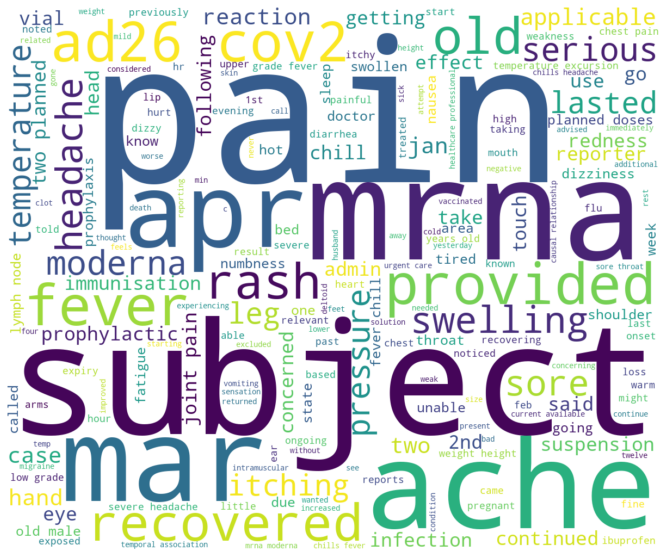

In [13]:
# Creating a list of words to create a Word Cloud

text = " ".join(review for review in master_df['SYMPTOM_TEXT'])
print ("There are {} words in the combination of all review.".format(len(text)))

#Create list of Stopwords 
stopwords = set(STOPWORDS)
stopwords.update(['admitted', 'emergency', 'discharged','concomitant','female','the', 'and', 'of', 'to', 'was', 'patient', 'a', 'on', 'for', 'covid', 'she', 'vaccine', 'in', 'at', '19', 'not', 'i', 'with', 'is', 'this', 'as', 'had', 'dose', 'after', 'no', 'her', 'that', 'received', 'reported', 'pfizer', 'it', 'an', 'from', 'arm', 'events', 'bnt162b2', 'report', 'my', 'vaccination', 'left', 's', 'injection', 'were', '12', 'he', 'unspecified', 'symptoms', 'lot', 'history', 'felt', 'medical', 'has', 'be', 'up', 'hours', 'first', 'any', 'but', 'day', 'number', 'unknown', 'minutes', 'or', 'outcome', '1', 'medications', 'other', 'about', 'positive', 'body','started', 'information', 'spontaneous', 'single', 'contactable', 'have', 'biontech', 'site', '2', 'administration', 'feeling', 'right', 'did', 'tested', 'included', 'been', 'like', 'date', 'event', 'via', 'experienced', 'then', 'days', 'if', 'prior', 'immunization','30', 'year', 'within', 'all', 'by', 'route', 'went', '10', 'back', 'got', 'took', '4', 'time', '20', 'given', 'batch', '5', 'benadryl', '3', 'tingling', '15', 't', 'also', 'side', 'still', 'hospital', 'treatment', '00', 'will', 'safety', 'around', 'stated', '2020', 'part', 'test', 'pt', 'nurse', 'developed', 'review', 'his', 'am', 'appropriate', 'well', 'weeks', 'receiving', 'adverse', 'when', 'resolved', 'there', 'home', 'second', 'blood', 'er', 'muscle', 'face', 'they', 'since', 'which', 'morning', 'requested', 'comments', 'work', 'sender', 'neck', 'very', 'are', 'night', 'some', 'post', 'normal', 'breath', 'later', 'ed', 'bp', 'out', 'next', 'get', 'down', 'cannot', 'response', 'taken', 'consumer', 'product', 'over', 'so', '21', 'having', 'feel', 'diagnosed', 'same', 'rate', 'including', 'better', 'evaluation', 'possible', 'non', 'age', 'soreness', 'just', 'began', '100', 'mg', 'administered', 'receive', '24', 'woke', '6', 'hives', 'cough', 'procedures', 'approximately', 'room', 'tongue', 'physician', 'tylenol', '18dec2020', 'pm', 'notified', 'allergies', 'follow', 'medication', 'today', 'evaluated', 'vaccines', 'shot', 'action', 'shortness', 'joint'
"vaccination", "pfizer", "biontech", "dose", "report", "covid", "event","patient","vaccine","single", "medical", "day","unknown","mg","daily","none","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",width=1200,height=1000).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We're now going to investigate some of the more common symptoms of people that had a severe reaction (defined as: hospitalization) and those that eventually died. 

In [14]:
hospitalized = master_df[master_df['HOSPITAL'] == 'Y'] 

words_hospital = hospitalized['SYMPTOM_TEXT'].str.findall("\w+")
words_hospital = list(itertools.chain(words_hospital))
words_hospital = oneDArray(words_hospital)

frequency_hospital = {}

for w in words_hospital:
    if w in frequency_hospital:
        frequency_hospital[w] += 1
    else:
        frequency_hospital[w] = 1
        
freq_hospital_series = pd.Series(data=frequency_hospital)
freq_hospital_series_sorted = freq_hospital_series.sort_values(ascending=False)

list_of_words_1 = []   
for index, items in freq_hospital_series_sorted.iteritems():
    if index not in list_of_words:
        list_of_words_1.append(index)
    elif index == 'just':
        break    

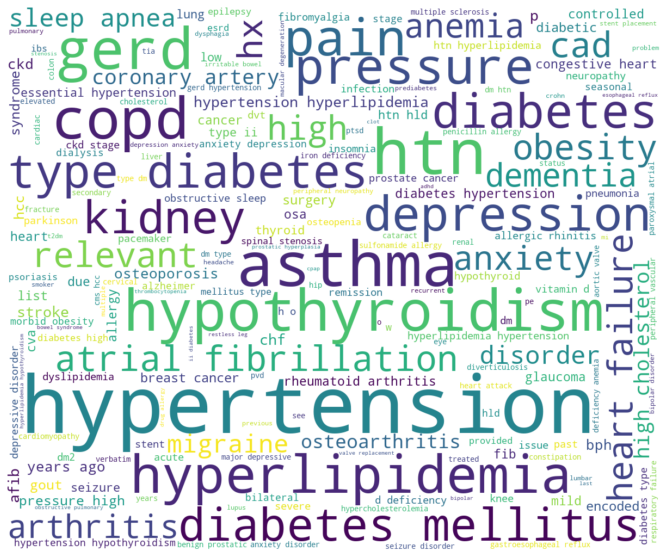

In [15]:
# Creating a list of words to create a Word Cloud

%matplotlib inline

text_4 = " ".join(review for review in hospitalized['HISTORY'])


#Create list of Stopwords 
stopwords = set(STOPWORDS)
stopwords.update(['conditions','concurrent','disease',' unkown', 'chronic','unknown', 'emergency', 'discharged','concomitant','female','the', 'and', 'of', 'to', 'was', 'patient', 'a', 'on', 'for', 'covid', 'she', 'vaccine', 'in', 'at', '19', 'not', 'i', 'with', 'is', 'this', 'as', 'had', 'dose', 'after', 'no', 'her', 'that', 'received', 'reported', 'pfizer', 'it', 'an', 'from', 'arm', 'events', 'bnt162b2', 'report', 'my', 'vaccination', 'left', 's', 'injection', 'were', '12', 'he', 'unspecified', 'symptoms', 'lot', 'history', 'felt', 'medical', 'has', 'be', 'up', 'hours', 'first', 'any', 'but', 'day', 'number', 'unknown', 'minutes', 'or', 'outcome', '1', 'medications', 'other', 'about', 'positive', 'body','started', 'information', 'spontaneous', 'single', 'contactable', 'have', 'biontech', 'site', '2', 'administration', 'feeling', 'right', 'did', 'tested', 'included', 'been', 'like', 'date', 'event', 'via', 'experienced', 'then', 'days', 'if', 'prior', 'immunization','30', 'year', 'within', 'all', 'by', 'route', 'went', '10', 'back', 'got', 'took', '4', 'time', '20', 'given', 'batch', '5', 'benadryl', '3', 'tingling', '15', 't', 'also', 'side', 'still', 'hospital', 'treatment', '00', 'will', 'safety', 'around', 'stated', '2020', 'part', 'test', 'pt', 'nurse', 'developed', 'review', 'his', 'am', 'appropriate', 'well', 'weeks', 'receiving', 'adverse', 'when', 'resolved', 'there', 'home', 'second', 'blood', 'er', 'muscle', 'face', 'they', 'since', 'which', 'morning', 'requested', 'comments', 'work', 'sender', 'neck', 'very', 'are', 'night', 'some', 'post', 'normal', 'breath', 'later', 'ed', 'bp', 'out', 'next', 'get', 'down', 'cannot', 'response', 'taken', 'consumer', 'product', 'over', 'so', '21', 'having', 'feel', 'diagnosed', 'same', 'rate', 'including', 'better', 'evaluation', 'possible', 'non', 'age', 'soreness', 'just', 'began', '100', 'mg', 'administered', 'receive', '24', 'woke', '6', 'hives', 'cough', 'procedures', 'approximately', 'room', 'tongue', 'physician', 'tylenol', '18dec2020', 'pm', 'notified', 'allergies', 'follow', 'medication', 'today', 'evaluated', 'vaccines', 'shot', 'action', 'shortness', 'joint'
"vaccination", "pfizer", "biontech", "dose", "report", "covid", "event","patient","vaccine","single", "medical", "day","unknown","mg","daily","none","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])


# Generate a word cloud image
wordcloud_1 = WordCloud(stopwords=stopwords, background_color="white",width=1200,height=1000).generate(text_4)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis("off")
plt.show()


And now investigating the words that are most prominent when the patient died of the Vaccine. 

In [16]:
died = master_df[master_df['DIED'] == 'Y'] 

words_died = died['SYMPTOM_TEXT'].str.findall("\w+")
words_died = list(itertools.chain(words_died))
words_died = oneDArray(words_died)

frequency_died = {}

for w in frequency_died:
    if w in frequency_died:
        frequency_died[w] += 1
    else:
        frequency_died[w] = 1
        
freq_died_series = pd.Series(data=frequency_died)
freq_died_series_sorted = freq_died_series.sort_values(ascending=False)

/Users/tenzin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app


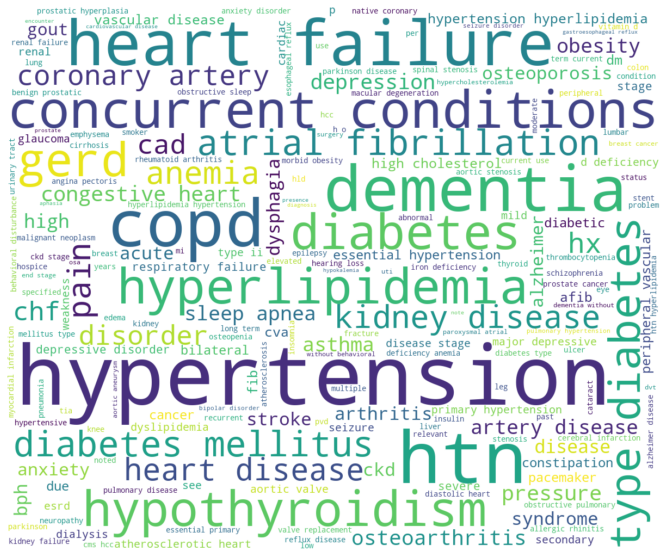

In [17]:
# Creating a list of words to create a Word Cloud

text_2 = " ".join(review for review in died['HISTORY'])


#Create list of Stopwords 
stopwords = set(STOPWORDS)
stopwords.update([' unkown', 'chronic','unknown', 'emergency', 'discharged','concomitant','female','the', 'and', 'of', 'to', 'was', 'patient', 'a', 'on', 'for', 'covid', 'she', 'vaccine', 'in', 'at', '19', 'not', 'i', 'with', 'is', 'this', 'as', 'had', 'dose', 'after', 'no', 'her', 'that', 'received', 'reported', 'pfizer', 'it', 'an', 'from', 'arm', 'events', 'bnt162b2', 'report', 'my', 'vaccination', 'left', 's', 'injection', 'were', '12', 'he', 'unspecified', 'symptoms', 'lot', 'history', 'felt', 'medical', 'has', 'be', 'up', 'hours', 'first', 'any', 'but', 'day', 'number', 'unknown', 'minutes', 'or', 'outcome', '1', 'medications', 'other', 'about', 'positive', 'body','started', 'information', 'spontaneous', 'single', 'contactable', 'have', 'biontech', 'site', '2', 'administration', 'feeling', 'right', 'did', 'tested', 'included', 'been', 'like', 'date', 'event', 'via', 'experienced', 'then', 'days', 'if', 'prior', 'immunization','30', 'year', 'within', 'all', 'by', 'route', 'went', '10', 'back', 'got', 'took', '4', 'time', '20', 'given', 'batch', '5', 'benadryl', '3', 'tingling', '15', 't', 'also', 'side', 'still', 'hospital', 'treatment', '00', 'will', 'safety', 'around', 'stated', '2020', 'part', 'test', 'pt', 'nurse', 'developed', 'review', 'his', 'am', 'appropriate', 'well', 'weeks', 'receiving', 'adverse', 'when', 'resolved', 'there', 'home', 'second', 'blood', 'er', 'muscle', 'face', 'they', 'since', 'which', 'morning', 'requested', 'comments', 'work', 'sender', 'neck', 'very', 'are', 'night', 'some', 'post', 'normal', 'breath', 'later', 'ed', 'bp', 'out', 'next', 'get', 'down', 'cannot', 'response', 'taken', 'consumer', 'product', 'over', 'so', '21', 'having', 'feel', 'diagnosed', 'same', 'rate', 'including', 'better', 'evaluation', 'possible', 'non', 'age', 'soreness', 'just', 'began', '100', 'mg', 'administered', 'receive', '24', 'woke', '6', 'hives', 'cough', 'procedures', 'approximately', 'room', 'tongue', 'physician', 'tylenol', '18dec2020', 'pm', 'notified', 'allergies', 'follow', 'medication', 'today', 'evaluated', 'vaccines', 'shot', 'action', 'shortness', 'joint'
"vaccination", "pfizer", "biontech", "dose", "report", "covid", "event","patient","vaccine","single", "medical", "day","unknown","mg","daily","none","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])


# Generate a word cloud image
wordcloud_2 = WordCloud(stopwords=stopwords, background_color="white",width=1200,height=1000).generate(text_2)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis("off")
plt.show()

Taking a look at the word cloud above we can see that the word 'heart' is mentioned quite frequently. We're going to dig through the 'deaths' dataframe to see if there is a prominent amount of patients that had heart problems

In [18]:
died[died['HISTORY'].str.contains('heart', case=False, regex=False, na=False)].head()

,VAX_MANU,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,RECVDATE,STATE
9735,MODERNA,64.0,64.0,NaN,M,NaN,1/1/2020: residents was found unresponsive. pronounced deceased at 6:02pm,Y,01/01/2021,NaN,NaN,NaN,NaN,NaN,NaN,N,12/30/2020,01/01/2021,2.0,NaN,OTH,NaN,invega trenza 546mg q3months lithium 300mg bid oxybutynin 5mg qid lipitor 20mg qhs cogentin 2mg bid norvasc 5mg qd dyazide capsule 37 5 25 mg (triamterene hctz) qd,- covid-19,schizophrenia unspecified anemia unspecified overweight overactive bladder atherosclerotic heart disease of native coronary artery without angina pectoris hypothyroidism due to medicaments and other exogenous substances nicotine dependence unspecified uncomplicated chronic viral hepatitis c unspecified age related cataract essential (primary) hypertension chronic obstructive pulmonary disease unspecified unspecified convulsions inhalant abuse uncomplicated other seizures,NaN,NaN,2,01/04/2021,NaN,NaN,NaN,- Clozaril - Tegretol,1,IM,NaN,01/04/2021,CA
10928,MODERNA,96.0,96.0,NaN,F,NaN,resident exhibited no adverse events during 30 minute monitoring following vaccine administration. resident found without pulse at 1900.,Y,01/03/2021,NaN,NaN,NaN,NaN,NaN,NaN,N,01/03/2021,01/03/2021,0.0,n/a.,SEN,NaN,robitussin cough+chest cong dm liquid 5 100 mg 5ml (dextromethorphan guaifenesin) tylenol extra strength tablet (acetaminophen) amlodipine besylate tablet 5 mg morphine solu tab 2 5mg capsaicin cream 0 025 % leflunomide tablet 10 mg levothy,resident had suspected vasovagal episode with drop in o2 saturation.,acute on chronic diastolic (congestive) heart failure rheumatoid arthritis unspecified anemia unspecified hypothyroidism unspecified cachexia essential (primary) hypertension dementia in other diseases classified elsewhere without behavioral disturbance age related physical debility other chronic pain dilated cardiomyopathy erythematous condition unspecified unspecified osteoarthritis unspecified site primary generalized (osteo)arthritis other spondylosis with radiculopathy lumbar region hyperkalemia other intervertebral disc degeneration lumbar region age related osteoporosis without current pathological fracture cervicalgia other biomechanical lesions of lumbar region bilateral primary osteoarthritis of knee localized edema hypo osmolality and hyponatremia other specified disorders of bone density and structure unspecified site history of falling weakness,NaN,NaN,2,01/04/2021,NaN,NaN,NaN,Celebrex and Tramadol,1,IM,RA,01/04/2021,MN
11779,PFIZER\BIONTECH,93.0,93.0,NaN,M,NaN,"the resident received is vaccine around 11:00 am and tolerated it without any difficulty or immediate adverse effects. he was at therapy from 12:36 pm until 1:22 pm when he stated he was too tired and could not do anymore. the therapist took him back to his room at that time and he got into bed himself but stated his legs felt heavy. at 1:50 pm the cna answered his call light and found he had taken himself to the bathroom. she stated that when he went to get back into the bed it was ""abnormal"" how he was getting into it so she assisted him. at that time he quit breathing and she called a rn into the room immediately. he was found without a pulse, respirations, or blood pressure at 1:54 pm. he was a dnr.",Y,01/04/2021,NaN,NaN,NaN,NaN,NaN,NaN,N,01/04/2021,01/04/2021,0.0,NaN,SEN,NaN,ferrex 150 mg folic acid 1 mg furosemide 20 mg isosorbide mononoitrate er 30 mg lactulose 15 ml omeprazole 40 mg potassium chloride er 20 meq metoprolol 12 5 mg preservision areds 2 one capsule ranolazine er 1 000 mg and sucralf,NaN,acute posthemorrhagic anemia atherosclerotic heart disease of native coronary artery with other forms of angina pectoris cardiac murmur unspecified chronic kidne

As heart related problems arn't adequetly covered by just the word itself we're going to add a few other related descriptors to get a percentage of patients that sufferered from heart complications that also passed. 

In [19]:
searchfor = ['heart', 'htn', 'hypertension'] 
heart_deaths = len(died[died['HISTORY'].str.contains('|'.join(searchfor))])

print(len(died))
len(master_df[master_df['DIED'] == 'Y'])

print("History of heart complications was present in {}% of the patients.".format(round((heart_deaths / len(died))*100,2)))

3700
History of heart complications was present in 27.7% of the patients.


From here we can see that quite a few of the people that have died have pre-existing health conditions & are generally older. We're going to dig into age of people of that have had severe reactions to the vaccine. 

### Investigation into conditions that impact severe cases (Age, prior conditions, etc.)

Through taking a cursory look at the data we can see that various prior conditions impact the liklihood of something serious happening after getting the vaccine. The next part of the investigation is going to look into how we can segment based on different variables. 


In [20]:
# Going to create an age bracket function to sort based on age 

def age_bracket_funct(number):
    
    if number < 17.0:
        return '<17'
    elif number >= 18.0 and number <= 29.0:
        return '18-29'
    elif number >= 30.0 and number <= 39.0:
        return '30-39'
    elif number >= 40.0 and number <= 49.0:
        return '40-49'
    elif number >= 50.0 and number <= 64.0:
        return '50-64'
    elif number >= 65.0 and number <= 74.0:
        return '65-74'
    elif number >= 75.0 and number <= 84.0:
        return '75-84'
    elif number > 85.0:
        return '85+'
    else: return 'not known'
    
master_df['AGE_BRACKET'] = master_df['AGE_YRS'].apply(age_bracket_funct)
died['AGE_BRACKET'] = died['AGE_YRS'].apply(age_bracket_funct)
hospitalized['AGE_BRACKET'] = hospitalized['AGE_YRS'].apply(age_bracket_funct)

/Users/tenzin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tenzin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Creating a bar chart for age in general then those with severe symptoms & death. 

Text(0.5, 1.0, 'Death response')

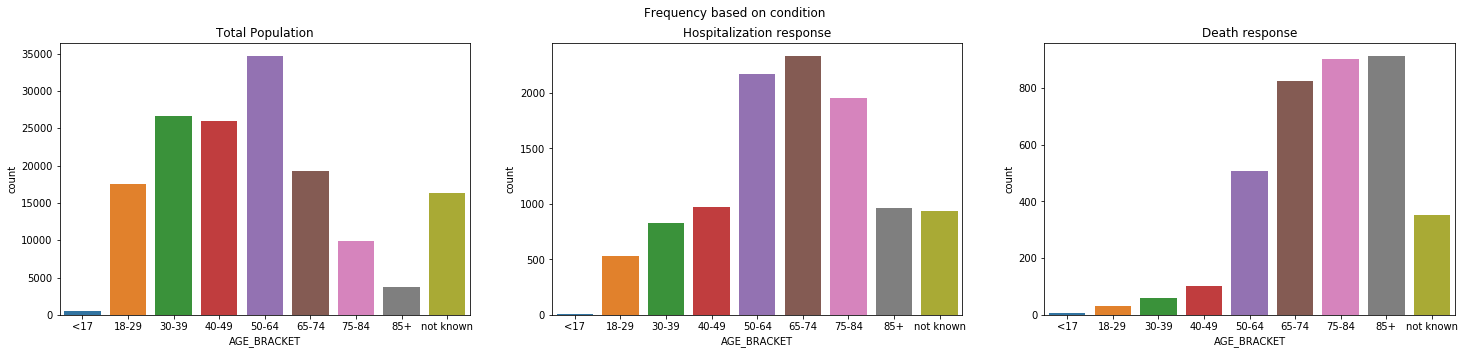

In [21]:
%matplotlib inline
import seaborn as sns

%matplotlib inline

fig, axes = plt.subplots(1, 3, figsize=(25, 5), sharey=False)
fig.suptitle('Frequency based on condition')

sns.countplot(x='AGE_BRACKET', data=master_df, order=['<17', '18-29', '30-39', '40-49', '50-64', '65-74', '75-84', '85+', 'not known'], ax=axes[0])
axes[0].set_title('Total Population')

sns.countplot(x='AGE_BRACKET', data=hospitalized, order=['<17', '18-29', '30-39', '40-49', '50-64', '65-74', '75-84', '85+', 'not known'], ax=axes[1])
axes[1].set_title('Hospitalization response')

sns.countplot(x='AGE_BRACKET', data=died, order=['<17', '18-29', '30-39', '40-49', '50-64', '65-74', '75-84', '85+', 'not known'], ax=axes[2])
axes[2].set_title('Death response')

We can see based on the above data plots that people that had a reaction to the vaccine (regardless of severity) followed, as what can be seen by the eye, as a normal distribution. Interestingly, there are minimal cases below 25 years old and the total frequency of cases is relatively low (as a percentage of total cases) for above 65. 

However, once we start looking at severe cases (designated by hospitialization) the story changes. It is disproportionately skewed to the right with most serious or fatal cases occuring in the 75+ age category.  

## Investigating the relative risk of taking the vaccine

The core question of this investigation is whether the vaccine is safe to take. In order to come to any sort of reasonable conclusion, we need to compare it to the relative risks of the world as risk doesn't occur in a vaccuum. If you were to look at motor vehicle injuries and deaths in the US (2019) we'd see that the aggregate numbers look very high (~39k deaths & 4.4 million injuries) [https://www.nsc.org/road-safety/safety-topics/fatality-estimates]. 

Based on those numbers alone one might come to the conclusion that driving is dangerous and we shouldn't do it. Aside from the tremendous value it brings from being able to shuttle from A to B relatively fast we also have the reference point of most car rides ending without an accident. 

To that point, it's important to weight the risks of taking the COVID vaccine compared to other endeavours (including the actual risk of getting the virus). From there, hopefully, people can make informed decisions. 

We're going to run through a few different comparison:
- Risk of getting COVID
- Risk of getting COVID & dying (by age group) 
- Risks vs other illness's (including the flu) 


In [22]:
# Parsing out from the CDC dataset relevant data around COVID & 'Our World in Data' - need to make sure the dates line up
owid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
owid_us = owid.iloc[72034]

cdc_deaths = pd.read_csv('Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.csv')
all_ages_deaths = cdc_deaths.head(17)

all_ages_deaths
list_of_indexes = [2,6,7,8,9,10,11,12,13,14,15,16]
new_ad = all_ages_deaths[all_ages_deaths.index.isin(list_of_indexes)]


In [23]:
# % of population that has gotten COVID
fraction_of_pop_covid = owid_us['total_cases']/328000000

# Percentage of population that has gotten COVID and died from it
fraction_of_covid_died = owid_us['total_deaths']/owid_us['total_cases']

print((fraction_of_pop_covid*fraction_of_covid_died)*100)


# Percentage of deaths 

new_ad['percentage_death'] = new_ad['COVID-19 Deaths'] / owid_us['total_cases']

test = (died['AGE_BRACKET'].value_counts()/len(master_df))*100

new_ad['percentage_death']

nan


/Users/tenzin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


2     18.000000   
6     151.833333  
7     271.250000  
8     446.000000  
9     711.416667  
10    1201.750000 
11    1977.500000 
12    6268.666667 
13    5052.166667 
14    9209.000000 
15    11782.000000
16    13191.666667
Name: percentage_death, dtype: float64

Text(0.5, 1.0, 'COVID deaths')

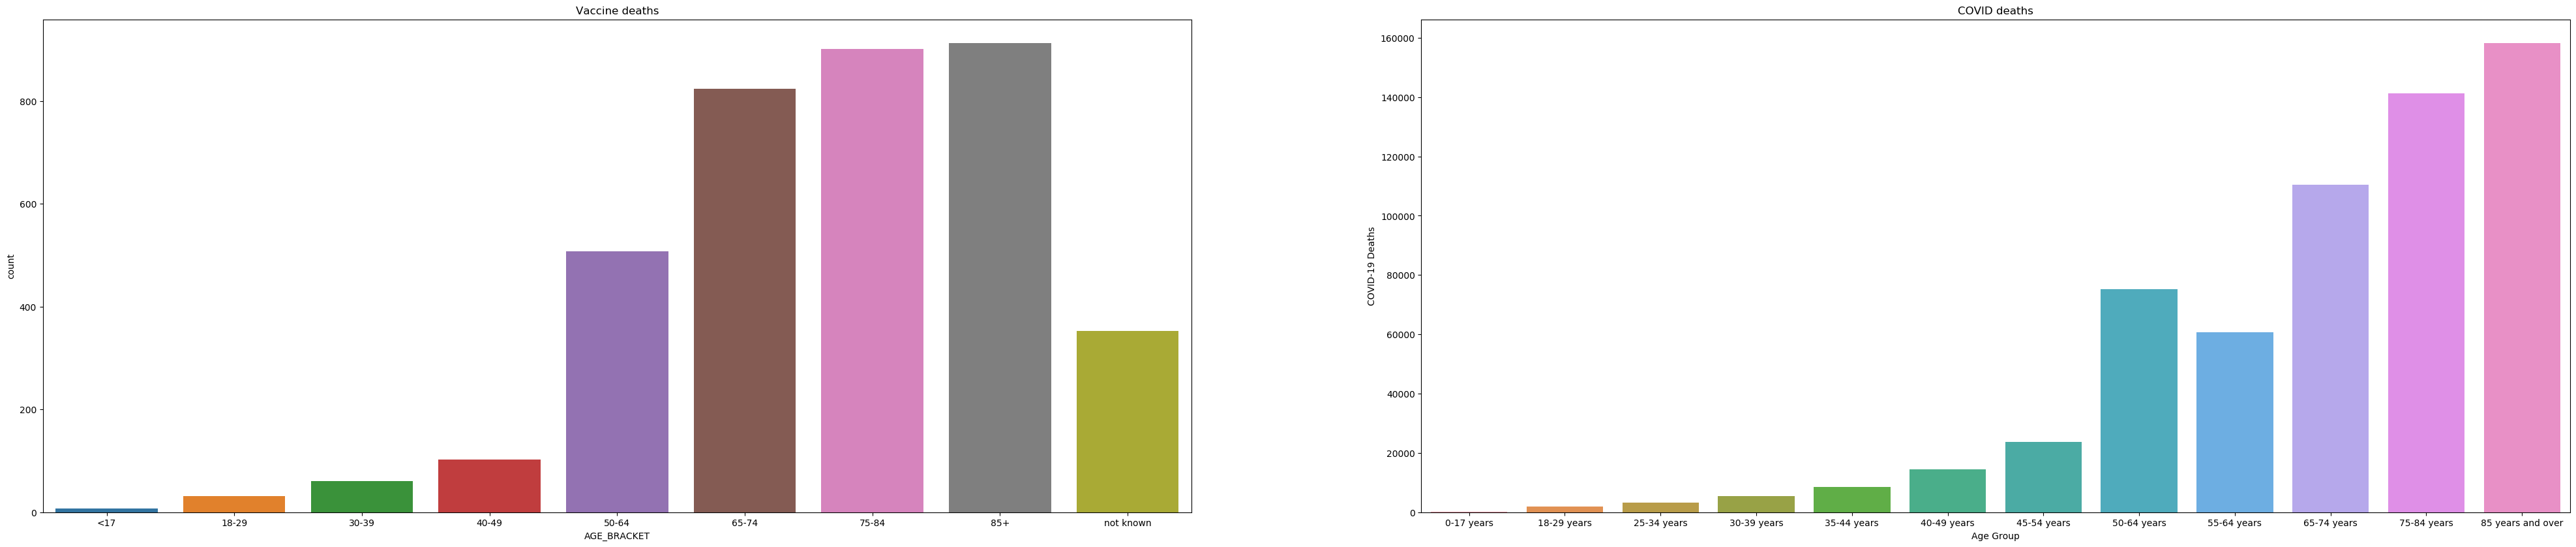

In [24]:
%matplotlib inline

fig, axes = plt.subplots(1, 2, figsize=(50, 10), sharey=False, dpi=100)


sns.countplot(x='AGE_BRACKET', data=died, order=['<17', '18-29', '30-39', '40-49', '50-64', '65-74', '75-84', '85+', 'not known'], ax=axes[0])
axes[0].set_title('Vaccine deaths')

sns.barplot(x='Age Group', y='COVID-19 Deaths', data=new_ad, ax=axes[1])
axes[1].set_title('COVID deaths')

#test.plot.bar()

### Relative risk of Vaccine

We're now going to take a look at various odds of dying to have perspective for where the vaccines fit in, risk wise. 

In [25]:
# We're going to compile a table with relative risks laid out so people can compare and get a better sense 

import requests

header = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36" ,
    'referer':'https://www.google.com/'
}

response = requests.get('https://injuryfacts.nsc.org/all-injuries/preventable-death-overview/odds-of-dying/', headers=header)
content = response.content

odds_dying = pd.read_html(content)[0]
list_of_indexes = [0,1,3,4,6,8,13,15,17,18,20,22,23]

odds_dying = odds_dying.iloc[list_of_indexes, :].reset_index(drop=True)
odds_dying



# Source: https://injuryfacts.nsc.org/all-injuries/preventable-death-overview/odds-of-dying/

Lifetime odds of death for selected causes, United States, 2019  \
                                                    Cause of Death   
0   Heart disease                                                    
1   Cancer                                                           
2   Chronic lower respiratory disease                                
3   Suicide                                                          
4   Fall                                                             
5   Gun assault                                                      
6   Choking on food                                                  
7   Sunstroke                                                        
8   Electrocution, radiation, extreme temperatures, and pressure     
9   Sharp objects                                                    
10  Hornet, wasp, and bee stings                                     
11  Dog attack                                                       
12  Lightning                                                        

                  
   Odds of Dying  
0   1 in 6        
1   1 in 7        
2   1 in 27       
3   1 in 88       
4   1 in 106      
5   1 in 289      
6   1 in 2,535    
7   1 in 8,248    
8   1 in 13,394   
9   1 in 29,334   
10  1 in 59,507   
11  1 in 86,781   
12  1 in 138,849

In [35]:
covid_risk_df = pd.DataFrame({'COVID/Vaccine risks': ['Contracting COVID in US', 'Dying from COVID (once contracted)', 'Hospitilzation after getting vaccine', 'Death after getting vaccine'], 'Odds of occurence': ['1 in 2630', '1 in 999', '1 in 3030', '1 in 62500'], 'Percentage': [0.38, 0.1, 0.033, 0.0016]})


covid_risk_df

# Source: https://19andme.covid19.mathematica.org/  -- COVID death rates based on me, a 32 yr old male 

,COVID/Vaccine risks,Odds of occurence,Percentage
0,Contracting COVID in US,1 in 2630,0.3800
1,Dying from COVID (once contracted),1 in 999,0.1000
2,Hospitilzation after getting vaccine,1 in 3030,0.0330
3,Death after getting vaccine,1 in 62500,0.0016


In [27]:
cases_age_group = pd.read_csv('/Users/tenzin/Downloads/cases_by_age_group.csv', header=2)
deaths_age_group = pd.read_csv('/Users/tenzin/Downloads/deaths_by_age_group.csv', header=2)
age_groups_vaccine_admin = pd.read_csv('/Users/tenzin/Downloads/age_groups_of_people_with_at_least_one_dose_administered.csv', header=2)

#cases_age_group['Percentage of death'] = (deaths_age_group['Count of deaths'] / cases_age_group['Count of cases'])*100

deaths_age_group


,Age Group,Percentage of deaths,Count of deaths,Percent of US population
0,0-4 Years,<0.1,140,6.0
1,5-17 Years,0.1,354,16.3
2,18-29 Years,0.5,2407,16.4
3,30-39 Years,1.2,5513,13.5
4,40-49 Years,2.9,13445,12.3
5,50-64 Years,14.9,69037,19.2
6,65-74 Years,21.4,99178,9.6
7,75-84 Years,27.5,127071,4.9
8,85+ Years,31.4,145274,2.0


In [28]:
deaths_age_group.iloc[1] = ['<18', 0.1, 494, 19.3]
deaths_age_group.iloc[7] = ['75+', 58.9, 272345, 6.9]
deaths_age_group = deaths_age_group.drop([0,8]).reset_index()

cases_age_group.iloc[1] = ['<18', 12.3, 3198300, 16.3]
cases_age_group.iloc[7] = ['75+', 6.2, 1594434, 6.9]
cases_age_group = cases_age_group.drop([0,8]).reset_index()

deaths_age_group = deaths_age_group.drop('index', 1)

deaths_age_group


,Age Group,Percentage of deaths,Count of deaths,Percent of US population
0,<18,0.1,494,19.3
1,18-29 Years,0.5,2407,16.4
2,30-39 Years,1.2,5513,13.5
3,40-49 Years,2.9,13445,12.3
4,50-64 Years,14.9,69037,19.2
5,65-74 Years,21.4,99178,9.6
6,75+,58.9,272345,6.9


In [29]:
cases_age_group['Count of deaths'] = deaths_age_group['Count of deaths']
cases_age_group['Percentage of deaths to cases'] = (cases_age_group['Count of deaths'] / cases_age_group['Count of cases'])*100


cases_age_group

,index,Age Group,Percent of cases,Count of cases,Percent of US population,Count of deaths,Percentage of deaths to cases
0,1,<18,12.3,3198300,16.3,494,0.015446
1,2,18-29 Years,22.5,5838502,16.4,2407,0.041226
2,3,30-39 Years,16.4,4263705,13.5,5513,0.129301
3,4,40-49 Years,14.9,3860365,12.3,13445,0.348283
4,5,50-64 Years,20.3,5286062,19.2,69037,1.306019
5,6,65-74 Years,7.5,1948908,9.6,99178,5.088901
6,7,75+,6.2,1594434,6.9,272345,17.080983


In [30]:
age_groups_vaccine_admin = age_groups_vaccine_admin.reindex(index=[6,5,4,3,2,1,0]).reset_index()

age_groups_vaccine_died = died['AGE_BRACKET'].value_counts()

age_groups_vaccine_died = age_groups_vaccine_died.reindex(index=['<17', '18-29', '30-39', '40-49', '50-64', '65-74', '75-84', '85+', 'not known'])

age_groups_vaccine_died['75-84'] = 1814
age_groups_vaccine_died = age_groups_vaccine_died.drop(labels='85+').rename(index={'75-84': '75+'})

#age_groups_vaccine_admin['Percentage deaths'] = (age_groups_vaccine_admin['# Persons at least One Dose'] / age_groups_vaccine_died)*100
age_groups_vaccine_died



<17          7   
18-29        32  
30-39        60  
40-49        103 
50-64        507 
65-74        824 
75+          1814
not known    353 
Name: AGE_BRACKET, dtype: int64

In [31]:
#for p in age_groups_vaccine_admin:

age_groups_vaccine_admin['Cases_died'] = 0

counter = 0
for p in range(0,7):
    age_groups_vaccine_admin['Cases_died'][p] = age_groups_vaccine_died[p]
    
age_groups_vaccine_admin['Percentage Died from Vaccine'] = (age_groups_vaccine_admin['Cases_died']/age_groups_vaccine_admin['# Persons at least One Dose'])*100
age_groups_vaccine_admin['Percentage Died from COVID'] = cases_age_group['Percentage of deaths to cases']



/Users/tenzin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,index,Age Group,% Persons at least One Dose,# Persons at least One Dose,% US Population,% Persons initiated vaccination in Last 14 Days,# Persons initiated vaccination in Last 14 Days,Cases_died,Percentage Died from Vaccine,Percentage Died from COVID
0,6,<18,2.6,3687617,21.9,5.4,495663,7,0.000190,0.015446
1,5,18-29,12.4,17724488,16.3,23.9,2199474,32,0.000181,0.041226
2,4,30-39,13.5,19366808,13.4,18.6,1712012,60,0.000310,0.129301
3,3,40-49,14.2,20243476,12.2,17.5,1614427,103,0.000509,0.348283
4,2,50-64,27.2,38861493,19.4,24.7,2274333,507,0.001305,1.306019
5,1,65-74,17.7,25362163,9.8,6.5,594992,824,0.003249,5.088901
6,0,75+,12.4,17679262,7.0,3.4,314895,1814,0.010261,17.080983


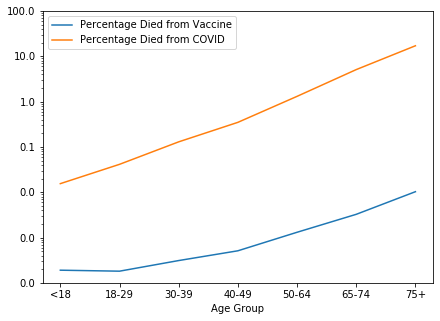

In [32]:
import matplotlib
from matplotlib import pyplot as plt




ax = age_groups_vaccine_admin.plot.line(x='Age Group', y=['Percentage Died from Vaccine', 'Percentage Died from COVID'], figsize=(7,5),logy=True, ylim=(0.0001, 100))
#ax.set_yticks([0.0001, 0.001, 0.01, 0.1, 0])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
age_groups_vaccine_admin

### Comparing Vaccines


We're going to inspect the various manufactured brands of vaccines to see their relative risk. 

In [33]:
# Numbers may be slightly off as the numbers for total vaccines delivered by manufacturer came from https://www.statista.com/statistics/1198516/covid-19-vaccinations-administered-us-by-company/
# Accurate as of May 16th
# Pfizer: 146,558,344
# Moderna: 117,131,627
# J&J: 9,654,031

master_df['DIED'] = master_df['DIED'].replace('Y', 1).fillna(0)
master_df['HOSPITAL'] = master_df['HOSPITAL'].replace('Y', 1).fillna(0)

print(master_df['VAX_MANU'].value_counts())

total_vaccines_added = [9654031, 117131627, 146558344]

vax_groupby_sum = master_df.groupby('VAX_MANU').sum().drop(['UNKNOWN MANUFACTURER'])
vax_groupby_avg = master_df.groupby('VAX_MANU').mean().drop(['UNKNOWN MANUFACTURER'])

vax_groupby_sum['VACCINES DELIVERED'] = 0

for r in range(0,3):
    vax_groupby_sum['VACCINES DELIVERED'][r] = (total_vaccines_added[r]*0.5)

vax_groupby_sum['VACCINES DELIVERED'][0] = 9654031
    
# These are not very 
vax_groupby_sum['% OF DEATH OVER DELIVERED'] = (vax_groupby_sum['DIED']/vax_groupby_sum['VACCINES DELIVERED'])*100
vax_groupby_sum['% OF HOSPITALIZATION OVER DELIVERED'] = (vax_groupby_sum['HOSPITAL']/vax_groupby_sum['VACCINES DELIVERED'])*100

vax_groupby_sum

MODERNA                 66420
PFIZER\BIONTECH         58417
JANSSEN                 29278
UNKNOWN MANUFACTURER    498  
Name: VAX_MANU, dtype: int64


/Users/tenzin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tenzin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,AGE_YRS,CAGE_YR,CAGE_MO,DIED,HOSPITAL,HOSPDAYS,NUMDAYS,FORM_VERS,VACCINES DELIVERED,% OF DEATH OVER DELIVERED,% OF HOSPITALIZATION OVER DELIVERED
VAX_MANU,,,,,,,,,,,
JANSSEN,1087638.50,969449.0,2.2,258.0,1250.0,4448.0,548487.0,58536,9654031,0.002672,0.012948
MODERNA,3248206.77,3237245.0,5.7,1839.0,4620.0,13069.0,1298772.0,132737,58565813,0.003140,0.007889
PFIZER\BIONTECH,2640744.81,2011552.0,4.3,1584.0,4770.0,12876.0,1029513.0,116665,73279172,0.002162,0.006509


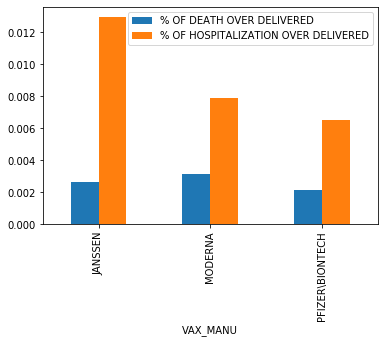

In [34]:
vax_groupby_sum.plot(kind='bar', use_index=True, y=['% OF DEATH OVER DELIVERED', '% OF HOSPITALIZATION OVER DELIVERED'])